# Eigenanalysis in 2-dimensions (orthogonal least squares regression)
#### by Elizabeth Barnes

Demonstration of how eigenanalysis in 2-dimensions (say, the x-y plane) leads to finding the orthongal least squares best fit line.

In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats
import numpy.linalg as LA

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

Let's start first by defining some constants to make my life easier later on.

In [23]:
mult_fact = 12
FS = 10
inc = .2
MS = 12

Next, we are going to make-up two data points (two dimensions) in x-y space and store them in a matrix called A. Let's plot them too to see what they look like

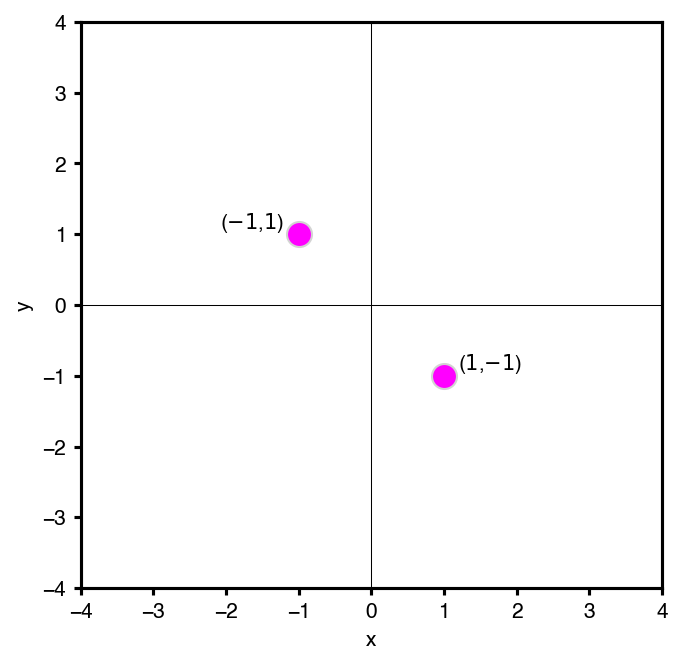

In [24]:
A = [[-1, 1],[1, -1]]

cgf.cfig(3, fig_width = cgf.fig_width, fig_height =  cgf.fig_width)
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-1$,$1$)", color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($1$,$-1$)", color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

gf.plot_zero_lines(linewidth = .5)

plt.xlabel('x')
plt.ylabel('y')    

plt.show()

Ok - all well and good. My guess is that your brain could easily fit a line through this point, right? In fact, for these two points, the line would perfectly intersect both pink points and we could talk about their position along this new line.

Let's do this using eigenanalysis (which will find the orthogonal best fit line for us).

In [25]:
C = np.cov(A, rowvar = 0)
LAM, E = LA.eig(C)
A_new = np.dot(A,E) #new coordinates of the pink points using our new "basis"
print(A_new)

[[ -1.41421356e+00   2.22044605e-16]
 [  1.41421356e+00  -2.22044605e-16]]


Notice that the _new_ coordinates are now $(-\sqrt{2},0)$ and $(\sqrt{2},0)$. Let's plot these results.

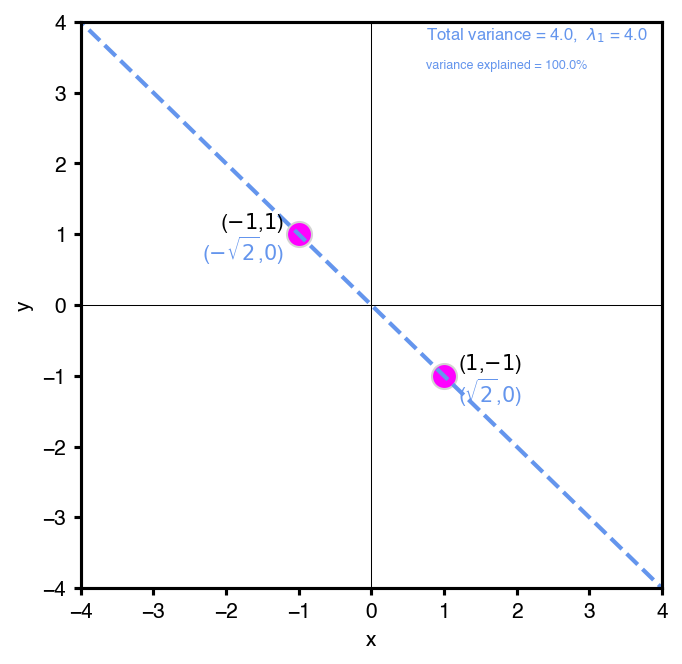

In [26]:
fig1, ax1 = cgf.cfig(1, fig_width = cgf.fig_width, fig_height =  cgf.fig_width)
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-1$,$1$)", color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'right', verticalalignment = 'top')

plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($1$,$-1$)", color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left', verticalalignment = 'top')

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.75,'Total variance = ' + str(np.sum(LAM)) + ',  $\lambda_1$ = ' + str(LAM[0]), color = 'cornflowerblue', fontsize = FS*.8)

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.35,'variance explained = ' + str(var_exp) + '%', color = 'cornflowerblue', fontsize = FS*.6)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y')    

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')

gf.plot_zero_lines(linewidth = .5)

fig1

OK - the black coordinates are the original coordinates of our pink points. The light blue are the coordinates along the new axis (dashed blue line). In the upper-right-hand corner we see how much variance of our data is explained by our light blue line - namely, all of it.

Next - if we find the line _orthogonal_ to the best-fit blue line, then we would have a new $R^2$ basis to describe _any_ point in our x-y space. This orthogonal line is output by the eigenanalysis and plotted in orange below.

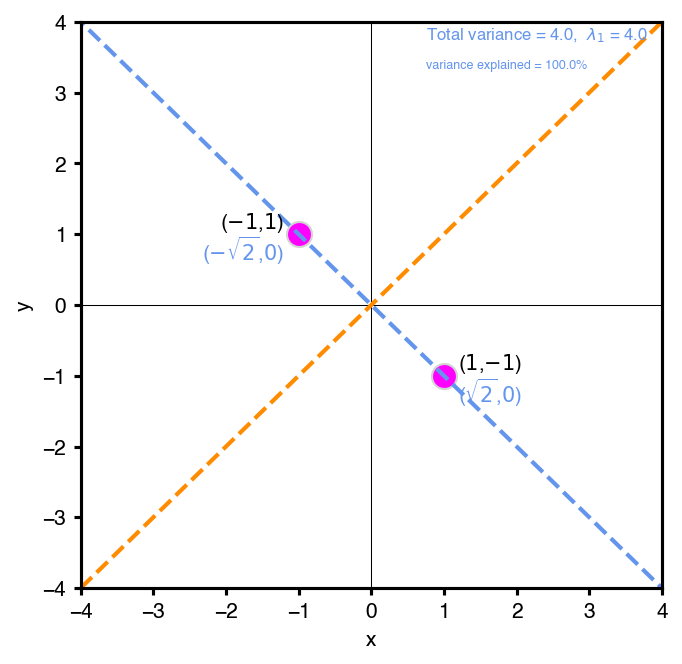

In [27]:
ax1.plot([E[1,1]*-mult_fact, E[1,1]*mult_fact],[E[-1,-1]*-mult_fact, E[-1,-1]*mult_fact],linestyle = '--', linewidth = 2, color = 'darkorange')
fig1

Ok - the above data was pretty simple - with the two points lying perfectly along a line. How about if we have more points that do not perfectly fall alone a single axis? Let's repeat our analysis again below for the following 3 points.

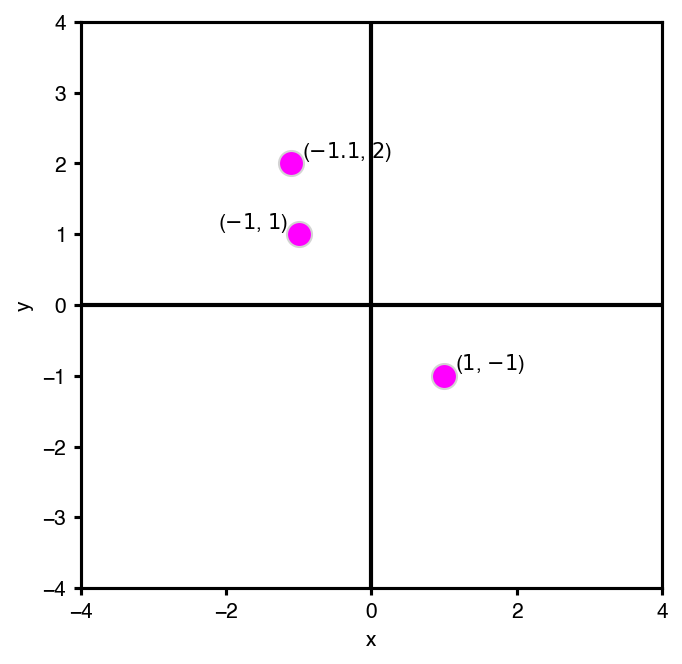

In [28]:
A = [[-1, 1],[1, -1],[-1.1, 2]]

inc = .15

fig2, ax2 = gf.cfig(2, fig_width = cgf.fig_width, fig_height = cgf.fig_width)
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

txt_str = r"($" + str(list(list(zip(*A)))[0][0]) + r"$, $" + str(list(list(zip(*A)))[1][0]) + r"$)"
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(list(zip(*A))[0][1]) + r"$, $" + str(list(list(zip(*A)))[1][1]) + r"$)"
plt.text(list(zip(*A))[0][1]+inc, list(list(zip(*A)))[1][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

txt_str = r"($" + str(list(list(zip(*A)))[0][2]) + r"$, $" + str(list(list(zip(*A)))[1][2]) + r"$)"
plt.text(list(zip(*A))[0][2]+inc, list(zip(*A))[1][2], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')


plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('x')
plt.ylabel('y')    

gf.plot_zero_lines(linewidth = 2)


fig2

Once again, let's find the orthogonal best fit line and the line orthogonal to that - together, these two lines will form a basis for $R^2$ and we can use this new basis to define the "coordinates" of our data points. In other words, we can re-write our data matrix "A" in _new_ units ("A_new") that use our new basis functions. Don't worry - we'll plot it to see what is actually going on.

In [29]:
C = np.cov(A, rowvar = 0)
LAM, E = LA.eig(C)
E[:,[0,1]] = E[:,[1,0]]
E[:,1] *=-1
A_new = np.dot(A,E)

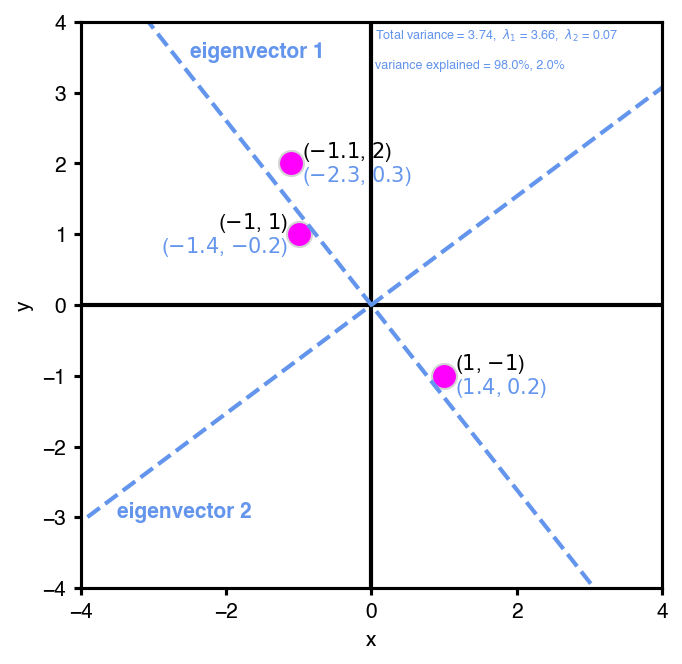

In [30]:
plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')
plt.plot([E[0,1]*-mult_fact, E[0,1]*mult_fact],[E[-1,1]*-mult_fact, E[-1,1]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')

txt_str = r"($" + str(round(list(zip(*A_new))[0][0],1)) + r"$, $" + str(round(list(zip(*A_new))[1][0],1)) + r"$)"
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'top')

txt_str = r"($" + str(round(list(zip(*A_new))[0][1],1)) + r"$, $" + str(round(list(zip(*A_new))[1][1],1)) + r"$)"
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')

txt_str = r"($" + str(round(list(zip(*A_new))[0][2],1)) + r"$, $" + str(round(list(zip(*A_new))[1][2],1)) + r"$)"
plt.text(list(zip(*A))[0][2]+inc, list(zip(*A))[1][2], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')


plt.text(.05,3.75,'Total variance = ' + str(gf.round_to_nearest(np.sum(LAM),.01)) + ',  $\lambda_1$ = ' + str(gf.round_to_nearest(LAM[1],.01))+ ',  $\lambda_2$ = ' + str(gf.round_to_nearest(LAM[0],.01)), color = 'cornflowerblue', fontsize = FS*.6)

var_exp = 100.*LAM[0]/np.sum(LAM)
var_exp2 = 100.*LAM[1]/np.sum(LAM)
plt.text(.05,3.35,'variance explained = ' + str(gf.round_to_nearest(var_exp2,.1)) + '%, ' + str(gf.round_to_nearest(var_exp,.1)) + '%', color = 'cornflowerblue', fontsize = FS*.6)


plt.text(-3.5, -3, "eigenvector 2", color = 'cornflowerblue', fontsize = FS, fontweight = 'bold')   
plt.text(-2.5, 3.5, "eigenvector 1", color = 'cornflowerblue', fontsize = FS, fontweight = 'bold')      

fig2


Notice how each point still has a coordinate in this new eigenvector space, but that the _first coordinate_ (associated with eigenvector 1) is the most important in explaining the differences between points. The second coordinate explains the rest.